In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse

In [2]:
def plot_metrics(log_path,num_ag):
    df = pd.read_csv(log_path)
    agents = range(num_ag)
    metrics = ["episode_return", "extract_gold", "mine_gold", "mine_iron"]

    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 6), sharey=False)

    for idx, metric in enumerate(metrics):
        y_mean = []
        y_ste = []
        for agent_idx in agents:
            col = f"{metric}_{agent_idx+1}" if metric != "episode_return" else f"agent_{agent_idx}/{metric}"
            Y = pd.to_numeric(df[col], errors='coerce').dropna()
            y_mean.append(Y.mean())
            y_ste.append(Y.std() / np.sqrt(len(Y)))

        x = np.arange(len(agents))
        axes[idx].bar(x, y_mean, yerr=y_ste, capsize=6, alpha=0.7)
        axes[idx].set_xticks(x)
        axes[idx].set_xticklabels([f"Agent {i}" for i in agents])
        axes[idx].set_title(metric.replace("_", " ").title())
        axes[idx].grid(axis='y', linestyle='--', alpha=0.6)

    fig.suptitle("Agent Metrics: Mean with Standard Error", fontsize=16)
    plt.tight_layout()
    plt.show()

In [3]:
def plot_metrics_ngroups(
    log_paths,
    num_ag,
    group_labels=None,
    colors=None,
):
    """
    Plot per-agent metrics for multiple groups (n >= 1).
    
    Args:
        log_paths: list of CSV paths (one per group).
        num_ag: number of agents.
        group_labels: list of labels for groups (defaults to Group 1..n).
        colors: list of colors for groups (defaults to matplotlib's cycle).
    """
    dfs = [pd.read_csv(p) for p in log_paths]
    n_groups = len(dfs)

    if group_labels is None:
        group_labels = [f"Group {i+1}" for i in range(n_groups)]
    if colors is None:
        prop_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
        colors = [prop_cycle[i % len(prop_cycle)] for i in range(n_groups)]

    agents = list(range(num_ag))
    metrics = ["episode_return", "extract_gold", "mine_gold", "mine_iron"]

    def per_agent_stats(df, metric):
        means, stes = [], []
        for agent_idx in agents:
            col = f"{metric}_{agent_idx+1}" if metric != "episode_return" else f"agent_{agent_idx}/{metric}"
            if col not in df.columns:
                means.append(np.nan)
                stes.append(np.nan)
                continue
            Y = pd.to_numeric(df[col], errors='coerce').dropna()
            if len(Y) == 0:
                means.append(np.nan)
                stes.append(np.nan)
            else:
                means.append(Y.mean())
                stes.append(Y.std(ddof=1) / np.sqrt(len(Y)))
        return np.array(means), np.array(stes)

    fig, axes = plt.subplots(1, len(metrics), figsize=(5 * len(metrics), 6), sharey=False)

    bar_width = 0.8 / n_groups  # shrink width so groups fit in [-0.4, +0.4] per x
    x = np.arange(len(agents))

    for idx, metric in enumerate(metrics):
        ax = axes[idx]
        for g, df in enumerate(dfs):
            m, e = per_agent_stats(df, metric)
            offset = (g - (n_groups - 1) / 2) * bar_width
            ax.bar(
                x + offset, m, yerr=e, capsize=5, alpha=0.85,
                width=bar_width, label=group_labels[g], color=colors[g]
            )

        ax.set_xticks(x)
        ax.set_xticklabels([f"Agent {i+1}" for i in agents])
        ax.set_title(metric.replace("_", " ").title())
        ax.grid(axis='y', linestyle='--', alpha=0.6)
        ax.legend(frameon=False)

    fig.suptitle("Agent Metrics: Mean ± Standard Error", fontsize=16)
    plt.tight_layout()
    plt.show()


In [ ]:
## 2 coop in 3 single 
#log_path_impala = f"/home/kumquat/Documents/Linfan/social-agents-JAX/results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-17_14:26:51.204572,./results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-17_14:26:51.204572,./results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-14_14:39:21.229188,./results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-14_14:39:21.229188,./results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-17_14:26:51.204572,./results/PopArtIMPALA_1_meltingpot_coop_mining_2025-03-17_14:26:51.204572/csv_logs/meltingpot_coop_mining.csv" 
log_path_impala = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/impala-5ag-alone/csv_logs/meltingpot_coop_mining.csv"
log_path_attn = f"/home/kumquat/Documents/Linfan/social-agents-JAX/results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-09-04_01:34:46.303068,./results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-06-10_21:32:15.740274,./results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-05-28_00:34:00.259639,./results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-05-28_00:34:00.259639,./results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-05-28_00:34:00.259639,./results/PopArtIMPALA_attention_1_meltingpot_coop_mining_2025-06-10_21:32:15.740274/csv_logs/meltingpot_coop_mining.csv" 
log_path_transformer = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/transformer-2coop3single/csv_logs/meltingpot_coop_mining.csv"
log_path_attn_transformer = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/attn-transformer-2coop3single/csv_logs/meltingpot_coop_mining.csv"

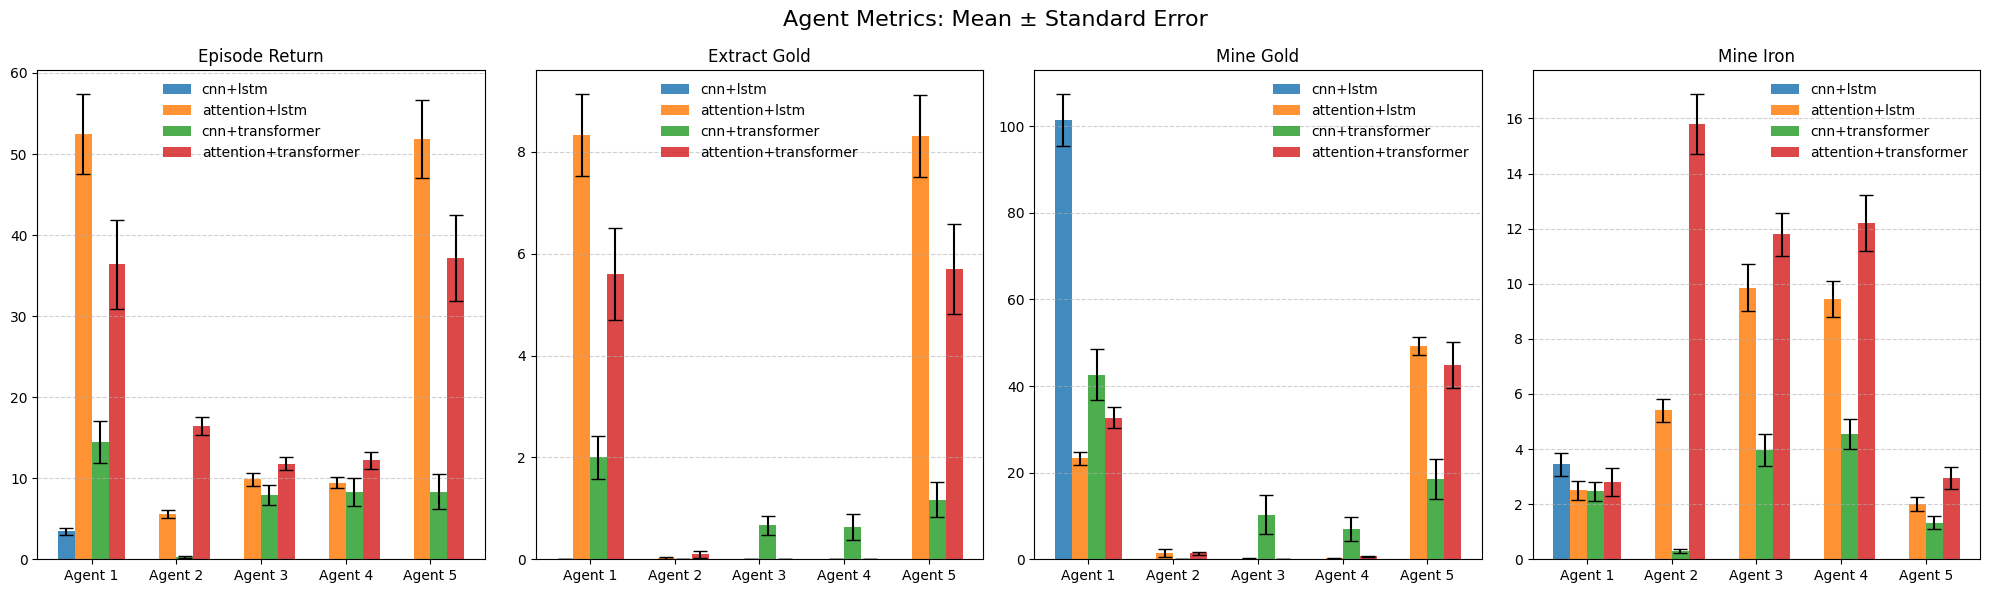

In [5]:
# two cooperators in a group of 5 
plot_metrics_ngroups([log_path_impala,log_path_attn,log_path_transformer,log_path_attn_transformer], num_ag= 5, group_labels=("cnn+lstm", "attention+lstm","cnn+transformer","attention+transformer"))

In [ ]:
# with only single agent sceneraio 
log_path_impala = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/impala-all-single/csv_logs/meltingpot_coop_mining.csv"
log_path_attn = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/attention-all-single/csv_logs/meltingpot_coop_mining.csv"
log_path_transformer = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/transformer-all-single/csv_logs/meltingpot_coop_mining.csv"
log_path_attn_transformer = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/enhance-attention-all-single/csv_logs/meltingpot_coop_mining.csv"
plot_metrics_ngroups([log_path_impala,log_path_attn,log_path_transformer,log_path_enhance_attn], num_ag= 1, group_labels=("cnn+lstm", "attention_lstm","cnn+transformer","attention_lstm(enhance)"))

FileNotFoundError: [Errno 2] No such file or directory: '/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/enhance-attention-all-single/csv_logs/meltingpot_coop_mining.csv'

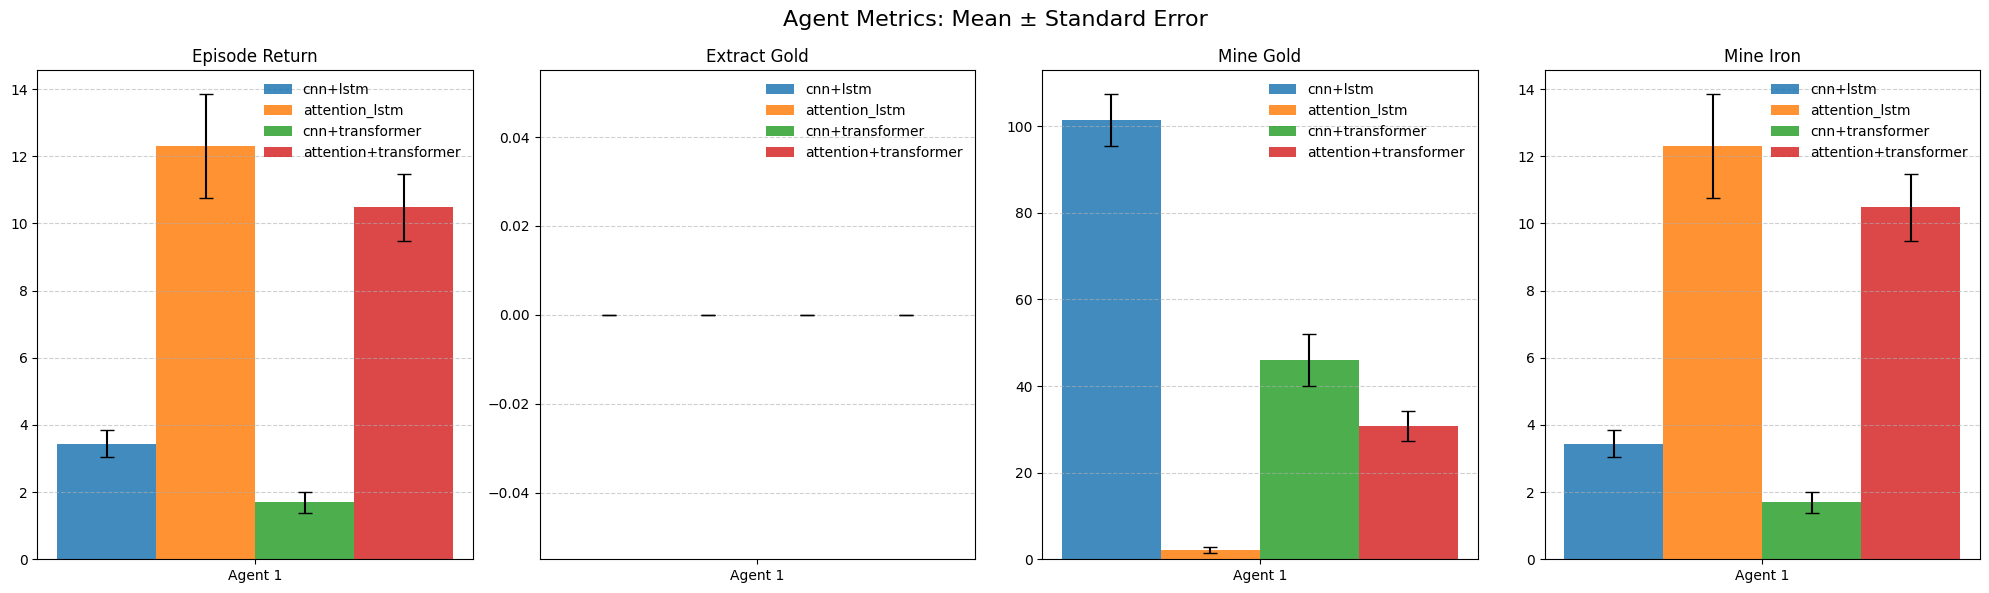

In [6]:
# alone 
#log_path_impala = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/impala-alone/csv_logs/meltingpot_coop_mining.csv"
log_path_impala = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/impala-5ag-alone/csv_logs/meltingpot_coop_mining.csv"
log_path_attn = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/attention-alone/csv_logs/meltingpot_coop_mining.csv"
log_path_transformer = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/transformer-alone/csv_logs/meltingpot_coop_mining.csv"
log_path_attn_transformer = f"/home/kumquat/Documents/Linfan/social-agents-JAX/cross_eval_results/attn-transformer-alone-5ag/csv_logs/meltingpot_coop_mining.csv"
plot_metrics_ngroups([log_path_impala,log_path_attn,log_path_transformer,log_path_attn_transformer], num_ag= 1, group_labels=("cnn+lstm", "attention_lstm","cnn+transformer","attention+transformer"))